# Day 3 – Convolutional Neural Networks (CNN) on Fashion-MNIST
Objective: Train a CNN on Fashion-MNIST dataset and evaluate performance.

In [8]:
# Step: importing necessary liabrary
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report

## 1. Load Dataset

In [11]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print("Train shape:", x_train.shape)
print("Test shape:", x_test.shape)

Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


## 2. Preprocess Data
- Normalize to [0,1]
- Reshape to (28,28,1)
- One-hot encode labels

In [14]:
# Normalize pixel values to 0–1
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

## 3. Build CNN Model

In [15]:
# Build a Sequential CNN model
model = Sequential([
    # First convolutional layer: 32 filters, 3x3 kernel, ReLU activation
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),

    # First max pooling layer: 2x2 pool size
    MaxPooling2D((2, 2)),

    # Second convolutional layer: 64 filters, 3x3 kernel, ReLU activation
    Conv2D(64, (3, 3), activation='relu'),

    # Second max pooling layer: 2x2 pool size
    MaxPooling2D((2, 2)),

    # Flatten the feature maps into a 1D vector
    Flatten(),

    # Fully connected (dense) layer with 128 units and ReLU activation
    Dense(128, activation='relu'),

    # Dropout layer to prevent overfitting (50% dropout rate)
    Dropout(0.5),

    # Output layer with 10 units (one for each class), softmax activation
    Dense(10, activation='softmax')
])

# Print the model architecture summary
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

## 4. Compile Model

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## 5. Train Model

In [17]:
history = model.fit(x_train, y_train_cat, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 43s 49ms/step - accuracy: 0.6980 - loss: 0.8414 - val_accuracy: 0.8570 - val_loss: 0.3771
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 81s 48ms/step - accuracy: 0.8541 - loss: 0.4170 - val_accuracy: 0.8733 - val_loss: 0.3350
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 42s 50ms/step - accuracy: 0.8738 - loss: 0.3470 - val_accuracy: 0.8842 - val_loss: 0.2999
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 80s 48ms/step - accuracy: 0.8880 - loss: 0.3112 - val_accuracy: 0.8965 - val_loss: 0.2730
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.8926 - loss: 0.2996 - val_accuracy: 0.9005 - val_loss: 0.2585


## 6. Evaluate Model

Test Accuracy: 0.897599995136261
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


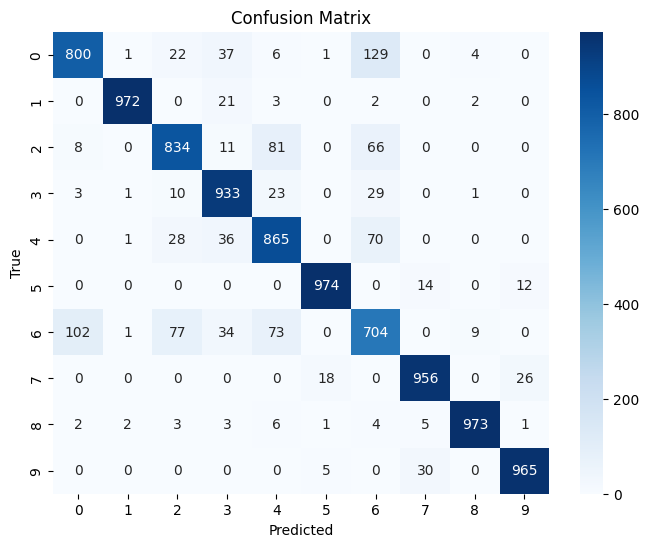

              precision    recall  f1-score   support

           0       0.87      0.80      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.86      0.83      0.84      1000
           3       0.87      0.93      0.90      1000
           4       0.82      0.86      0.84      1000
           5       0.97      0.97      0.97      1000
           6       0.70      0.70      0.70      1000
           7       0.95      0.96      0.95      1000
           8       0.98      0.97      0.98      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [18]:
# Step: Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print("Test Accuracy:", test_acc)
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
print(classification_report(y_test, y_pred_classes))